In [5]:
import pandas as pd
# import Quandl
import quandl

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [8]:
import pandas as pd
import quandl
import math



df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [24]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#30 Days in advanced it will be 98.4% accurate

35
0.9772793351983756


In [23]:
#Chaning type of Algorithm to svm.SVR

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVR(gamma='auto') #Using different algorithm 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#35 Days in advanced it will be 81.0% accurate


35


0.6746706348487752


35
[1077.70430355 1092.39965513 1106.31408264 1100.719536   1094.18658194
 1091.59345509 1089.99753644 1086.9248138  1080.76704987 1076.41469091
 1074.11719436 1094.1522281  1112.53570917 1116.63883726 1131.65414908
 1135.60912378 1134.06601383 1131.71016154 1133.42374956 1152.29597857
 1151.09139224 1161.07798864 1157.59308312 1165.49900617 1186.19194026
 1198.25229145 1192.35743868 1204.39996652 1209.8977254  1208.12236096
 1198.88631658 1204.31304647 1203.16770802 1138.58630291 1085.49821364] 0.9792710970440522 35


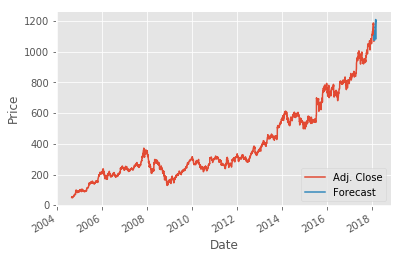

In [29]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
# print(accuracy)

forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()